In [138]:
## Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
## Loading Dataset
from google.colab import files
files.upload()

Saving iris (1).xls to iris (1) (1).xls


{'iris (1).xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00D\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00C\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff

In [140]:
data=pd.read_excel('iris (1).xls')

In [141]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [143]:
data.shape

(150, 5)

In [144]:
##Checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [145]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [146]:
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [147]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [148]:
##Filtering out columns with Null Values
features_with_na = [features for features in data.columns
                                 if data[features].isna().sum()>0]

In [149]:
features_with_na

['SL', 'SW', 'PL']

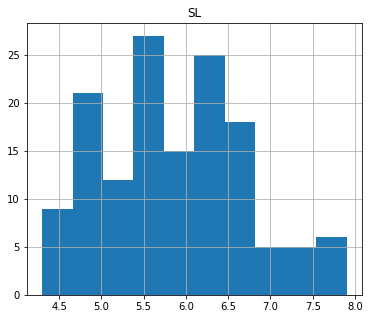

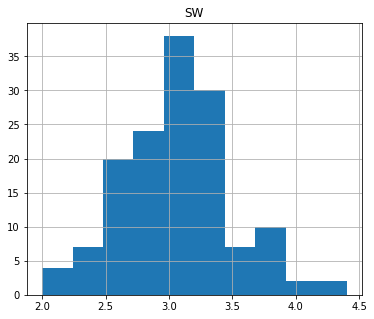

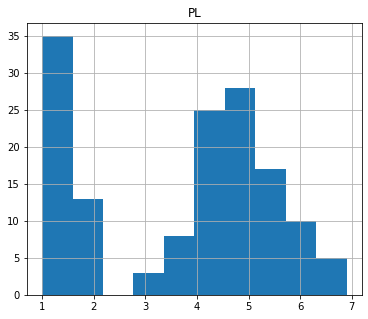

In [150]:
## Checking for type of Distribution
for feature in features_with_na:
    data1 = data.copy()

    data1[feature].hist(figsize=(6,5))
    ##plt.hist(data1[feature])
    plt.title(feature)
    ##bel('')
    plt.show()

In [151]:
## Filling in Missing Values
for i in ['SL', 'SW', 'PL']:
    data[i]= data[i].fillna(data[i].median())

In [152]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [153]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**Handling Outliers**

In [154]:
features_fl = data.select_dtypes(include=['float'])

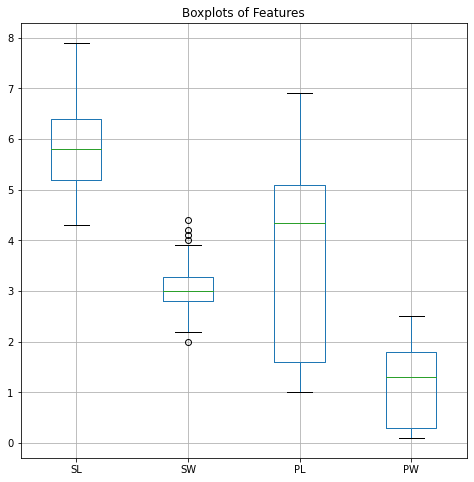

In [155]:
features_fl.boxplot(figsize=(8,8))
plt.title('Boxplots of Features')
plt.show()

In [156]:
data1=data.copy()

In [157]:
## Handling Outliers using IQR Method
SW_Q1=np.percentile(data['SW'], 25, interpolation='midpoint')
SW_Q2=np.percentile(data['SW'], 50, interpolation='midpoint')
SW_Q3=np.percentile(data['SW'], 75, interpolation='midpoint')

In [158]:
SW_Q1, SW_Q2, SW_Q3 

(2.8, 3.0, 3.25)

In [159]:
SW_IQR= SW_Q3-SW_Q1

In [160]:
SW_IQR

0.4500000000000002

In [161]:
SW_low_lim = SW_Q1-1.5*SW_IQR
SW_up_lim = SW_Q3+1.5*SW_IQR

In [162]:
SW_low_lim, SW_up_lim

(2.1249999999999996, 3.9250000000000003)

In [163]:
outlier1= []
for x in data1['SW']:
  if((x>SW_up_lim) or (x<SW_low_lim)):
    outlier1.append(x)

In [164]:
outlier1

[4.0, 4.4, 4.1, 4.2, 2.0]

In [165]:
SW_ind1 = data1['SW']>SW_up_lim 
SW_ind2 = data1['SW']<SW_low_lim 


In [166]:
data1.loc[SW_ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [167]:
data1.loc[SW_ind2].index

Int64Index([60], dtype='int64')

In [168]:
## Dropping the rows featuring the outliers from the dataset
data1= data1.drop(data1.loc[SW_ind1].index)
data1= data1.drop(data1.loc[SW_ind2].index)

In [169]:
data1.shape

(145, 5)

In [170]:
data1['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [171]:
## Assigning Feature and Target Columns
y = data1['Classification']
X= data1.drop('Classification', axis=1)

**Label Encoding**

In [172]:
##Encoding target variable
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
Y = lab_enc.fit_transform(y)

In [173]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Scaling the Data**

In [174]:
#Feature Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
X1 = std_scl.fit_transform(X)

In [175]:
X1

array([[-0.94297454,  1.27741054, -1.43439825, -1.35904738],
       [-1.1886732 , -0.06285378, -1.43439825, -1.35904738],
       [-0.0830292 ,  0.47325195, -1.49300286, -1.35904738],
       [-1.5572212 ,  0.20519909, -1.37579365, -1.35904738],
       [-1.06582387,  1.54546341, -1.43439825, -1.35904738],
       [-0.57442654,  2.349622  , -1.25858443, -1.09435716],
       [-1.5572212 ,  1.00935768, -1.43439825, -1.22670227],
       [-1.06582387,  1.00935768, -1.37579365, -1.35904738],
       [-1.80291987, -0.33090664, -1.43439825, -1.35904738],
       [-1.1886732 ,  0.20519909, -1.37579365, -1.49139249],
       [-0.57442654, -0.06285378, -1.37579365, -1.35904738],
       [-1.31152254,  1.00935768, -1.31718904, -1.35904738],
       [-1.31152254, -0.06285378, -1.43439825, -1.49139249],
       [-1.9257692 , -0.06285378, -1.61021207, -1.49139249],
       [-0.57442654,  2.349622  , -1.49300286, -1.09435716],
       [-0.94297454,  1.27741054, -1.43439825, -1.22670227],
       [-0.20587854,  2.

In [176]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.25, random_state = 42)

In [177]:
X1_train

array([[ 1.02261479,  0.20519909,  0.32373993,  0.22909395],
       [ 0.53121746, -0.06285378,  0.61676296,  0.36143906],
       [ 0.53121746, -0.33090664,  1.0269952 ,  0.7584744 ],
       [ 0.65406679,  0.47325195,  0.85118138,  1.42019995],
       [ 1.51401213, -0.06285378,  1.20280902,  1.15550973],
       [ 0.16266946, -2.20727669,  0.67536756,  0.36143906],
       [-0.94297454,  1.27741054, -1.43439825, -1.35904738],
       [ 0.03982013,  0.47325195,  0.55815835,  0.7584744 ],
       [-1.31152254,  0.20519909, -1.31718904, -1.35904738],
       [-0.94297454,  2.08156914, -1.14137522, -1.09435716],
       [-0.4515772 , -1.13506523,  0.32373993, -0.03559627],
       [-1.06582387,  1.00935768, -1.31718904, -1.09435716],
       [-0.8201252 , -0.06285378, -1.37579365, -1.35904738],
       [-1.06582387, -0.06285378, -1.31718904, -1.35904738],
       [-0.0830292 ,  1.00935768,  0.38234453,  0.49378417],
       [ 0.2855188 , -0.5989595 ,  0.49955374, -0.03559627],
       [-0.69727587,  1.

In [178]:
Y_train

array([1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [179]:
X1_test

array([[ 0.65406679, -0.33090664,  0.26513532,  0.09674884],
       [ 1.02261479, -0.06285378,  0.79257677,  1.42019995],
       [-1.43437187,  0.47325195, -1.31718904, -1.35904738],
       [-0.0830292 ,  1.81351627, -1.37579365, -1.09435716],
       [-0.94297454,  2.08156914, -1.31718904, -1.35904738],
       [ 2.25110813, -0.5989595 ,  1.67164586,  1.02316462],
       [ 2.49680679,  2.08156914,  1.49583205,  1.02316462],
       [-0.20587854, -1.40311809,  0.67536756,  1.02316462],
       [-0.4515772 , -1.40311809,  0.0893215 ,  0.09674884],
       [-0.57442654,  1.00935768, -1.25858443, -1.35904738],
       [-1.31152254, -0.06285378, -1.43439825, -1.49139249],
       [-0.8201252 , -0.86701237,  0.0307169 ,  0.22909395],
       [ 0.53121746, -0.5989595 ,  0.73397217,  0.36143906],
       [ 0.16266946, -0.86701237,  0.73397217,  0.49378417],
       [ 0.16266946, -0.33090664,  0.38234453,  0.36143906],
       [-1.06582387,  1.27741054, -1.49300286, -1.22670227],
       [ 2.25110813,  2.

In [180]:
Y_test

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2])

**Classification Models**

Logistic Regression Model

In [181]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
lr_model = log_reg.fit(X1_train, Y_train)
lr_y_pred = lr_model.predict(X1_test)

In [182]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [183]:
print(confusion_matrix(Y_test, lr_y_pred))
print('Accuracy Score: ', accuracy_score(Y_test, lr_y_pred))
print('Precision Score: ', precision_score(Y_test, lr_y_pred, average=None))
print('Recall Score: ', recall_score(Y_test, lr_y_pred, average=None))

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
Accuracy Score:  0.9459459459459459
Precision Score:  [1.         0.88888889 0.92857143]
Recall Score:  [1.         0.88888889 0.92857143]


KNN Model

In [184]:
#Using KNeighborsClassifier Method of neighbors class 
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_model = knn.fit(X1_train, Y_train)
  knn_y_pred = knn_model.predict(X1_test)
  acc = accuracy_score(Y_test, knn_y_pred)
  metric_k.append(acc)

In [185]:
metric_k

[0.9459459459459459,
 0.918918918918919,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8918918918918919]

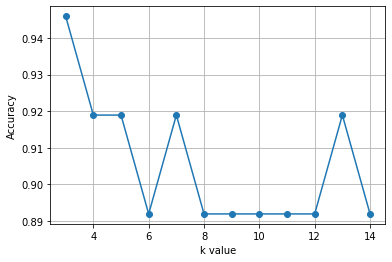

In [186]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [187]:
knn = KNeighborsClassifier(n_neighbors=2)
knn_model2 = knn.fit(X1_train, Y_train)
y_pred_knn = knn_model2.predict(X1_test)

In [188]:
print(confusion_matrix(Y_test, y_pred_knn))
print('Accuracy Score: ', accuracy_score(Y_test, y_pred_knn))
print('Precision Score: ', precision_score(Y_test, y_pred_knn, average=None))
print('Recall Score: ', recall_score(Y_test, y_pred_knn, average=None))

[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]
Accuracy Score:  0.918918918918919
Precision Score:  [1.         0.8        0.92307692]
Recall Score:  [1.         0.88888889 0.85714286]


SVM Model

In [189]:
from sklearn.svm import SVC

In [190]:
## SVM Linear
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X1_train, Y_train)
svm_y_pred = svm_model.predict(X1_test)

In [191]:
print(confusion_matrix(Y_test, svm_y_pred))
print('Accuracy Score: ', accuracy_score(Y_test, svm_y_pred))

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
Accuracy Score:  0.9459459459459459


In [192]:
## SVM RBF
svm_clf_rbf = SVC(kernel='rbf')
svm_model2 = svm_clf_rbf.fit(X1_train, Y_train)
y_pred_rbf = svm_model2.predict(X1_test)

In [193]:
print(confusion_matrix(Y_test, y_pred_rbf))
print('Accuracy Score: ', accuracy_score(Y_test, y_pred_rbf))

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
Accuracy Score:  0.9459459459459459


In [194]:
## SVM Poly
svm_clf_pol = SVC(kernel='poly')
svm_model3 = svm_clf_pol.fit(X1_train, Y_train)
y_pred_pol = svm_model3.predict(X1_test)

In [195]:
print(confusion_matrix(Y_test, y_pred_pol))
print('Accuracy Score: ', accuracy_score(Y_test, y_pred_pol))

[[13  1  0]
 [ 0  9  0]
 [ 0  4 10]]
Accuracy Score:  0.8648648648648649


Decision Tree Model

In [196]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_model = dtm_clf.fit(X1_train, Y_train)
dtm_y_pred = dtm_model.predict(X1_test)

In [197]:
print(confusion_matrix(Y_test, dtm_y_pred))
print('Accuracy Score: ', accuracy_score(Y_test, dtm_y_pred))

[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]
Accuracy Score:  0.918918918918919


Random Forest Model

In [198]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 42)
rf_model = rf_clf.fit(X1_train, Y_train)
rf_y_pred = rf_model.predict(X1_test)

In [199]:
print(confusion_matrix(Y_test, rf_y_pred))
print('Accuracy Score: ', accuracy_score(Y_test, rf_y_pred))

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
Accuracy Score:  0.9459459459459459


Comparing Accuracy of different Classification Models

1.Logistic Regression: 94.59%

2.Knn: 91.89%

3.SVM(kernel=rbf): 94.59%

4.SVM(kernel=linear): 94.59%

5.SVMSVM(kernel=poly): 86.48%

6.Decision Trees: 91.89%

7.Random Forest: 94.59%

From above Linear Regression model, SVM, and Random Forest model give the maximum accuracy.